# Imports


In [41]:
import pandas as pd
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

Data loading, and dropping of unnecessary columns

In [42]:
df = pd.read_csv('data/kc_house_data.csv')
df.drop(columns= ['date','view','sqft_above','sqft_basement','zipcode','lat','long','sqft_living15','sqft_lot15'],inplace = True)
df.head()
 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,0.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,NaN
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0


In [43]:
df. columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'yr_built',
       'yr_renovated'],
      dtype='object')

In [44]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000,17755.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676,83.636778
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234,399.946414
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,2015.000000


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors



# EDA And Data Cleaning

In [45]:
df.shape

(21597, 12)

- **Number of Rows (Observations):** There are 21597 rows in the DataFrame.
- **Number of Columns (Variables):** There are 12 columns (or variables) in the DataFrame.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21597 non-null  int64  
 1   price         21597 non-null  float64
 2   bedrooms      21597 non-null  int64  
 3   bathrooms     21597 non-null  float64
 4   sqft_living   21597 non-null  int64  
 5   sqft_lot      21597 non-null  int64  
 6   floors        21597 non-null  float64
 7   waterfront    19221 non-null  float64
 8   condition     21597 non-null  int64  
 9   grade         21597 non-null  int64  
 10  yr_built      21597 non-null  int64  
 11  yr_renovated  17755 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 2.0 MB


In [47]:
#drop duplicates
df = df.drop_duplicates(subset= ['id'])

In [48]:
df.isna().sum()

id                 0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront      2353
condition          0
grade              0
yr_built           0
yr_renovated    3804
dtype: int64

In [49]:
#droppping nans since they can distort model e.g we dont know if the house was renovated.

In [50]:
df['waterfront'].sample(n= 30)

2730     0.0
9874     0.0
7530     0.0
18408    0.0
9661     0.0
5092     0.0
11999    0.0
10949    0.0
16607    0.0
588      0.0
6385     0.0
11960    0.0
12173    0.0
13696    0.0
2252     0.0
7632     0.0
6420     0.0
14138    0.0
4688     0.0
17236    0.0
355      0.0
18359    0.0
13824    0.0
5814     0.0
20179    0.0
20657    NaN
18428    0.0
8349     0.0
781      0.0
8300     0.0
Name: waterfront, dtype: float64

NaNs in waterfront mean they have no waterfront, so we shall fill with 0.0

NaNs in yr_renovated mean they were not renovated, so we shall fill with 0.0


We shall drop them later however, when the individual cases need so... since almost half of our data would be gone !

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21420 non-null  int64  
 1   price         21420 non-null  float64
 2   bedrooms      21420 non-null  int64  
 3   bathrooms     21420 non-null  float64
 4   sqft_living   21420 non-null  int64  
 5   sqft_lot      21420 non-null  int64  
 6   floors        21420 non-null  float64
 7   waterfront    19067 non-null  float64
 8   condition     21420 non-null  int64  
 9   grade         21420 non-null  int64  
 10  yr_built      21420 non-null  int64  
 11  yr_renovated  17616 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 2.1 MB


## Pair plot

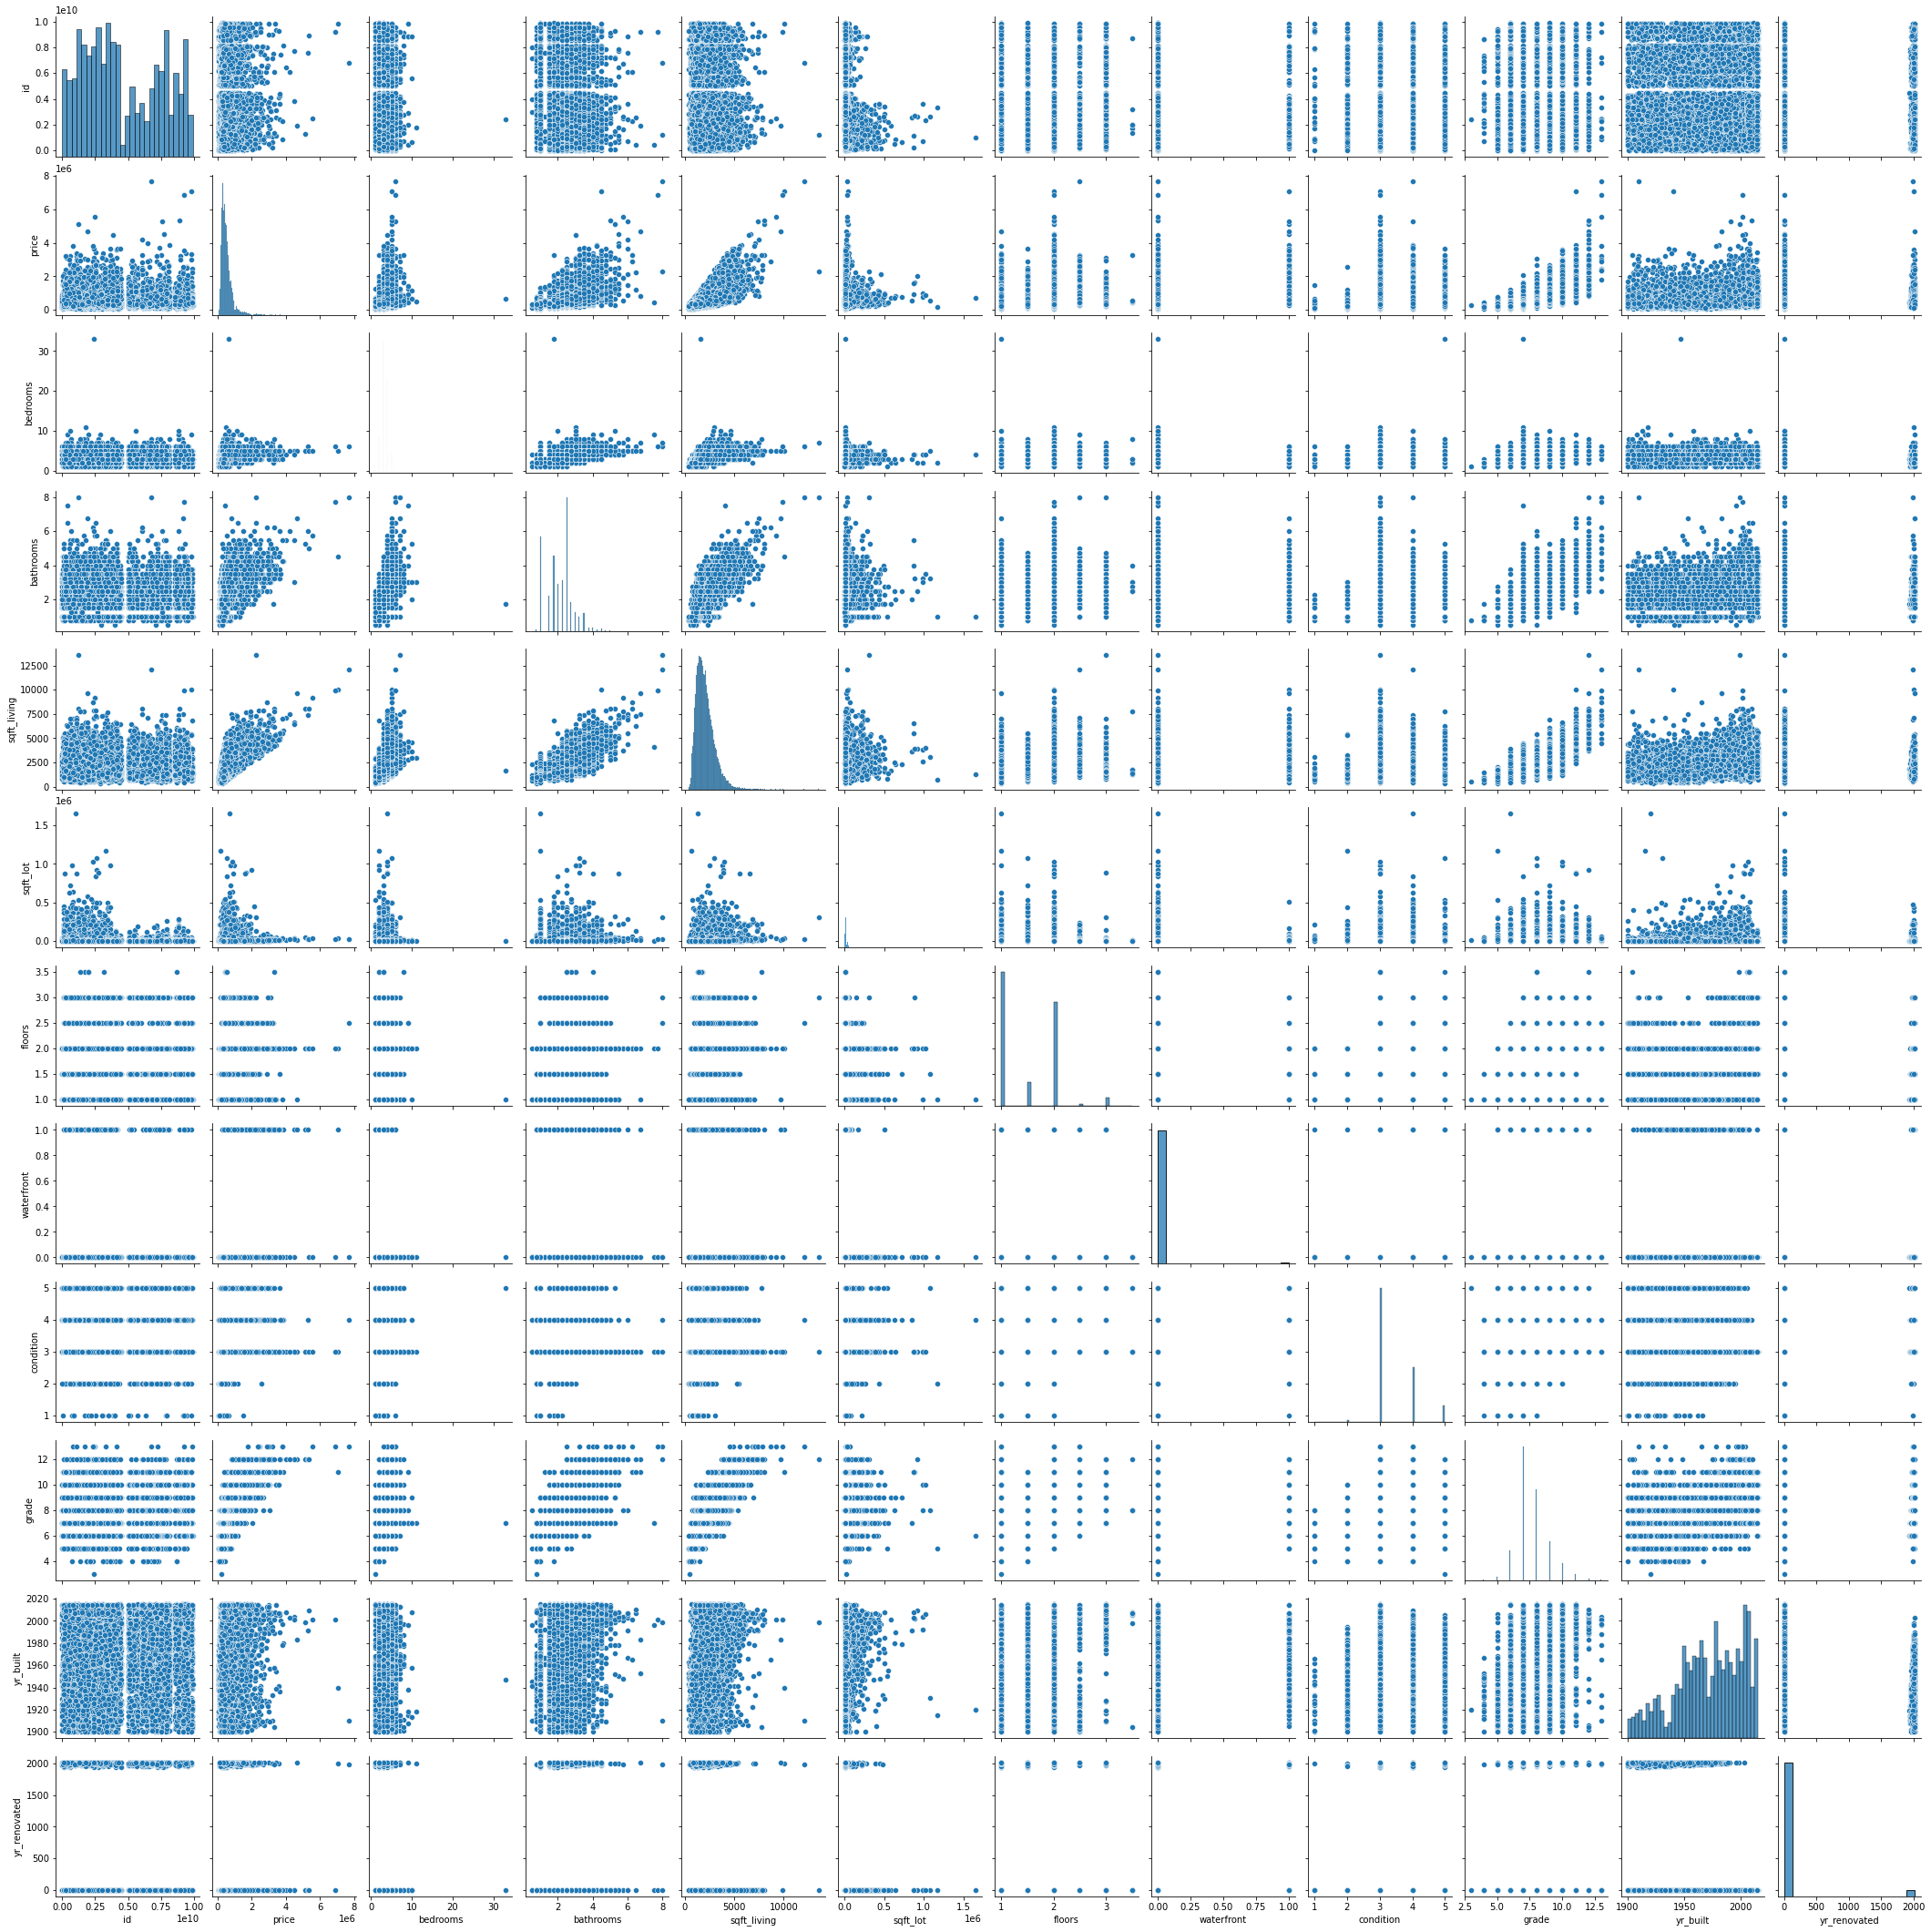

In [52]:
sns.pairplot(data=df)

## Correlation HeatMap

<AxesSubplot:>

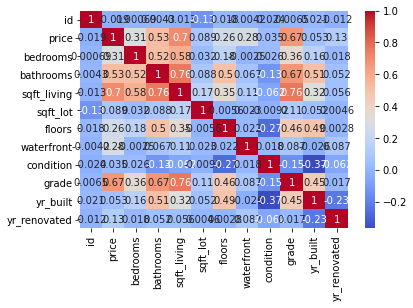

In [53]:
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

In [54]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
id,1.000000,-0.018525,0.000691,0.004343,-0.013451,-0.132648,0.018139,-0.004185,-0.024300,0.006470,0.021171,-0.012272
price,-0.018525,1.000000,0.309453,0.526229,0.701875,0.089111,0.256286,0.276888,0.034779,0.668020,0.052906,0.130341
bedrooms,0.000691,0.309453,1.000000,0.515383,0.579069,0.032490,0.177734,-0.002486,0.025893,0.357988,0.155241,0.018087
bathrooms,0.004343,0.526229,0.515383,1.000000,0.755522,0.087779,0.501803,0.067303,-0.129362,0.665587,0.506252,0.051699
sqft_living,-0.013451,0.701875,0.579069,0.755522,1.000000,0.172586,0.352868,0.110330,-0.061677,0.762477,0.316646,0.055545
sqft_lot,-0.132648,0.089111,0.032490,0.087779,0.172586,1.000000,-0.005561,0.023127,-0.009169,0.113656,0.052312,0.004565
floors,0.018139,0.256286,0.177734,0.501803,0.352868,-0.005561,1.000000,0.021649,-0.266859,0.458091,0.488935,0.002807
waterfront,-0.004185,0.276888,-0.002486,0.067303,0.110330,0.023127,0.021649,1.000000,0.017568,0.087480,-0.026441,0.087396
condition,-0.024300,0.034779,0.025893,-0.129362,-0.061677,-0.009169,-0.266859,0.017568,1.000000,-0.150508,-0.365129,-0.062230
grade,0.006470,0.668020,0.357988,0.665587,0.762477,0.113656,0.458091,0.087480,-0.150508,1.000000,0.446235,0.016899


# Feature Selection

In [55]:
# top predictors
# sqft_living, grade, bathrooms, bedrooms, floors ,
# we shall also take waterfront and yr_renovated along with them for analysis
# they exhibit some multi collinearity but lets test them out
 # select most important features
df_selected = df[['price','grade','bathrooms','bedrooms','floors','sqft_living','yr_renovated','waterfront']]
df_selected.head()

,price,grade,bathrooms,bedrooms,floors,sqft_living,yr_renovated,waterfront
0,221900.0,7,1.00,3,1.0,1180,0.0,NaN
1,538000.0,7,2.25,3,2.0,2570,1991.0,0.0
2,180000.0,6,1.00,2,1.0,770,NaN,0.0
3,604000.0,7,3.00,4,1.0,1960,0.0,0.0
4,510000.0,8,2.00,3,1.0,1680,0.0,0.0


explanation...

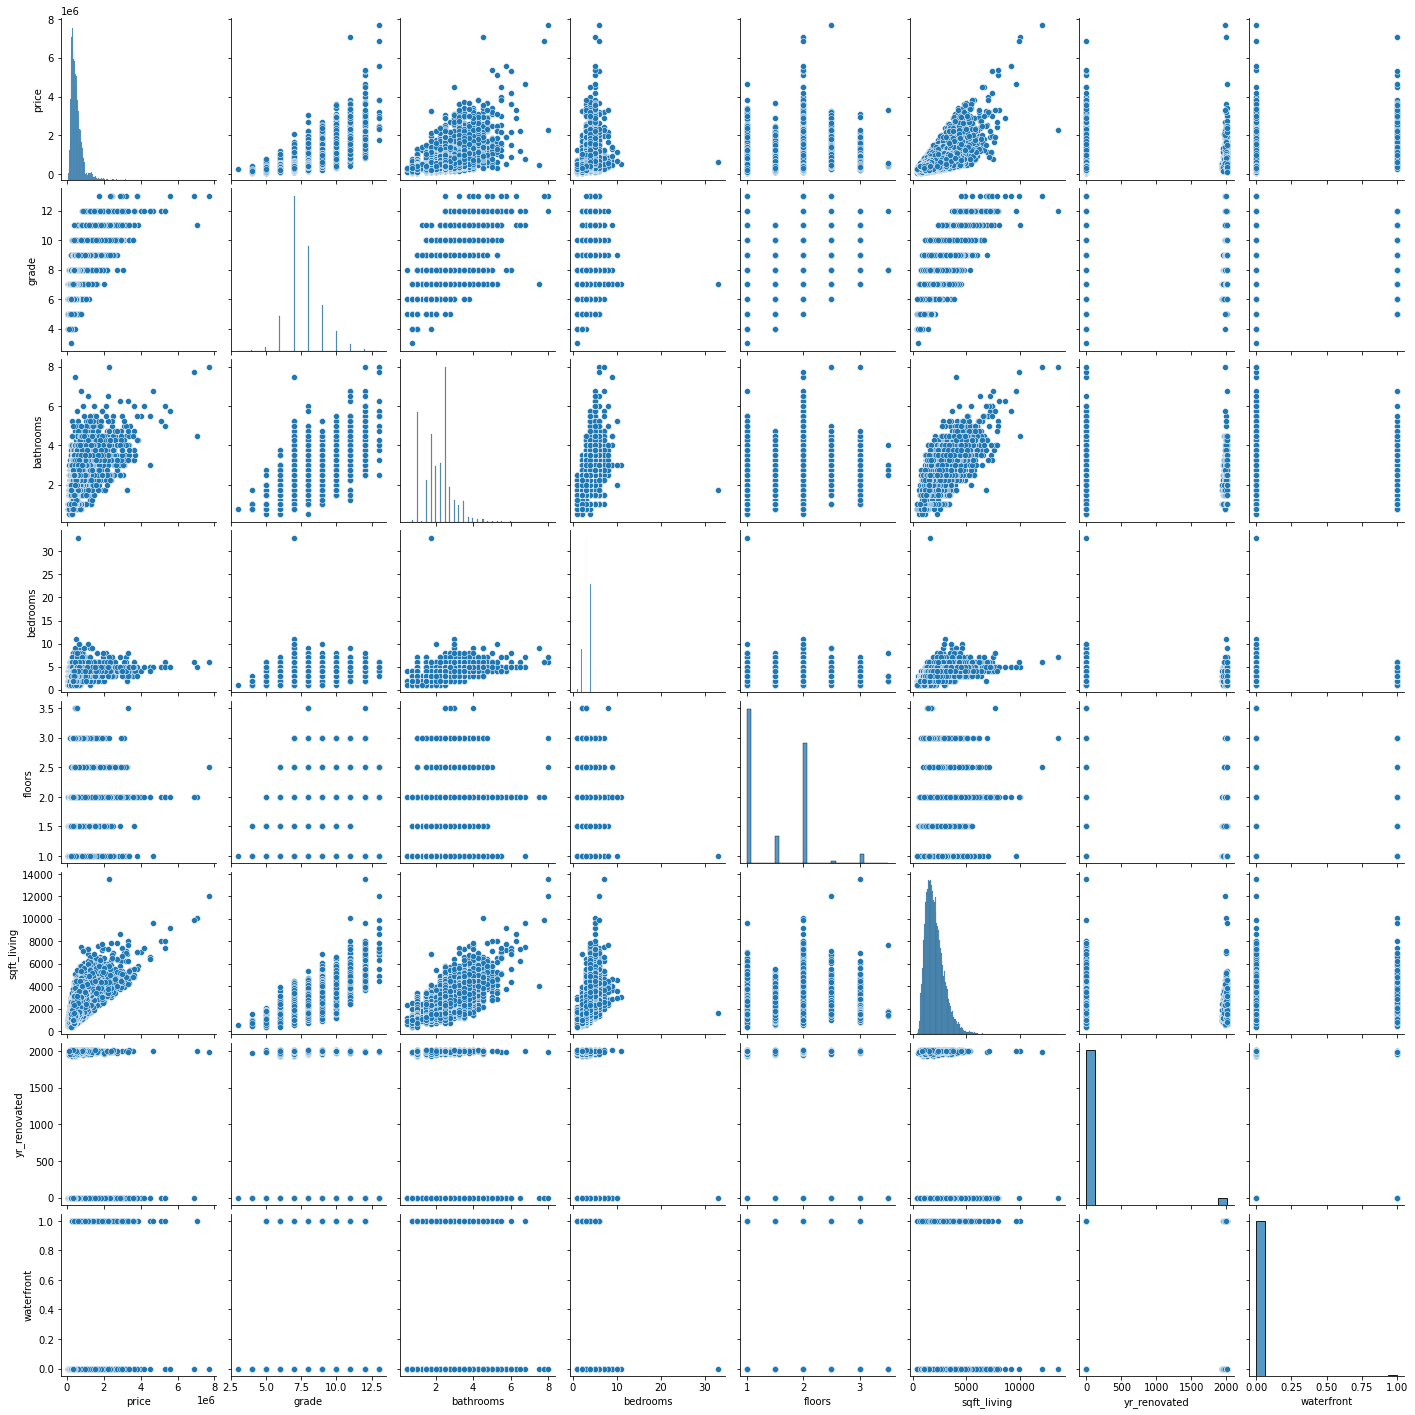

In [56]:
sns.pairplot(data=df_selected)

## Data Cleaning

Checking for outliers

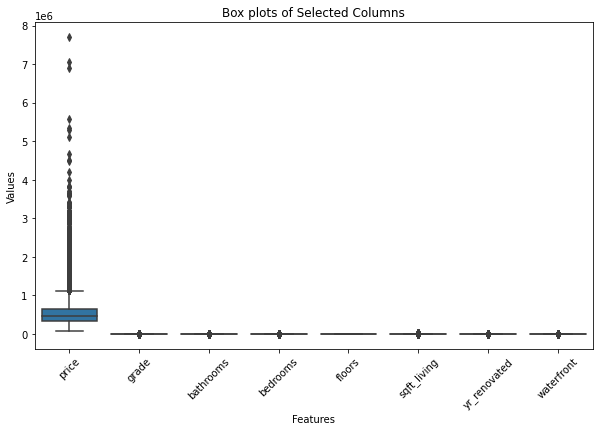

In [57]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_selected)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [58]:
#dropping outliers in price and sqft_living, it would mess with model if I did so  for yr renovated and waterfront, 
#other features dont have much variability

In [59]:
df_selected_outliers = df_selected[['price','sqft_living']]
# Calculate IQR for selected columns
Q1 = df_selected_outliers.quantile(0.25)
Q3 = df_selected_outliers.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df_selected_outliers< lower_bound) | (df_selected_outliers > upper_bound)).any(axis=1)

# Print indices of outliers
outlier_indices = df_selected.index[outliers]

## Remove the outliers 

In [60]:
# droping all columns with outliers 
df_selected = df_selected.drop(outlier_indices)

# Data analysis

Analysis 1: Does renovation of a house affect its sale price? If so, by how much

For this we'll create 2 models, one with the renovations and its control, to try an establish whether there is indeed a link

## Analysis 1, (Predicting Price of houses with and without renovations)

In [61]:
df_selected.head()

,price,grade,bathrooms,bedrooms,floors,sqft_living,yr_renovated,waterfront
0,221900.0,7,1.00,3,1.0,1180,0.0,NaN
1,538000.0,7,2.25,3,2.0,2570,1991.0,0.0
2,180000.0,6,1.00,2,1.0,770,NaN,0.0
3,604000.0,7,3.00,4,1.0,1960,0.0,0.0
4,510000.0,8,2.00,3,1.0,1680,0.0,0.0


In [62]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20095 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         20095 non-null  float64
 1   grade         20095 non-null  int64  
 2   bathrooms     20095 non-null  float64
 3   bedrooms      20095 non-null  int64  
 4   floors        20095 non-null  float64
 5   sqft_living   20095 non-null  int64  
 6   yr_renovated  16531 non-null  float64
 7   waterfront    17868 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 1.4 MB


In [63]:
df_selected.describe()

,price,grade,bathrooms,bedrooms,floors,sqft_living,yr_renovated,waterfront
count,2.009500e+04,20095.000000,20095.000000,20095.000000,20095.000000,20095.000000,16531.000000,17868.000000
mean,4.737215e+05,7.516646,2.041801,3.321075,1.473999,1954.195870,74.360111,0.002798
std,2.051190e+05,1.014726,0.696555,0.900340,0.536939,732.982251,377.990533,0.052826
min,7.800000e+04,3.000000,0.500000,1.000000,1.000000,370.000000,0.000000,0.000000
25%,3.150000e+05,7.000000,1.500000,3.000000,1.000000,1400.000000,0.000000,0.000000
50%,4.350000e+05,7.000000,2.000000,3.000000,1.000000,1850.000000,0.000000,0.000000
75%,5.999500e+05,8.000000,2.500000,4.000000,2.000000,2420.000000,0.000000,0.000000
max,1.120000e+06,12.000000,7.500000,33.000000,3.500000,4230.000000,2015.000000,1.000000


In [64]:
#we create new dataframe for our analysis
df_renovation = df_selected

In [65]:
#drop nans in column of interest, drop waterfront. not necessary
df_renovation = df_renovation.dropna(subset= ['yr_renovated'])
df_renovation = df_renovation.drop(columns= ['waterfront'])


In [66]:
# Replace values in column 'yr_renovated' with booleans based on a condition
df_renovation['yr_renovated'] = df_renovation['yr_renovated'].apply(lambda x: x > 0)

In [67]:
df_renovation

,price,grade,bathrooms,bedrooms,floors,sqft_living,yr_renovated
0,221900.0,7,1.00,3,1.0,1180,False
1,538000.0,7,2.25,3,2.0,2570,True
3,604000.0,7,3.00,4,1.0,1960,False
4,510000.0,8,2.00,3,1.0,1680,False
6,257500.0,7,2.25,3,2.0,1715,False
...,...,...,...,...,...,...,...
21592,360000.0,8,2.50,3,3.0,1530,False
21593,400000.0,8,2.50,4,2.0,2310,False
21594,402101.0,7,0.75,2,2.0,1020,False
21595,400000.0,8,2.50,3,2.0,1600,False


In [68]:
# split into 2 dataframes, one with renovated houses, the other without
df_renovation_with = df_renovation[df_renovation['yr_renovated']== True]
df_renovation_without =  df_renovation[df_renovation['yr_renovated']== False]

In [69]:
df_renovation_with.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 1 to 20946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         616 non-null    float64
 1   grade         616 non-null    int64  
 2   bathrooms     616 non-null    float64
 3   bedrooms      616 non-null    int64  
 4   floors        616 non-null    float64
 5   sqft_living   616 non-null    int64  
 6   yr_renovated  616 non-null    bool   
dtypes: bool(1), float64(3), int64(3)
memory usage: 34.3 KB


In [70]:
df_renovation_without.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15915 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         15915 non-null  float64
 1   grade         15915 non-null  int64  
 2   bathrooms     15915 non-null  float64
 3   bedrooms      15915 non-null  int64  
 4   floors        15915 non-null  float64
 5   sqft_living   15915 non-null  int64  
 6   yr_renovated  15915 non-null  bool   
dtypes: bool(1), float64(3), int64(3)
memory usage: 885.9 KB


# Data Preparations


We shall now model both dataframes and compare

## Model 1 with renovations

In [71]:
x_m1 = df_renovation_with[['grade',  'sqft_living','bathrooms','bedrooms']]
x_m1.head()

y_m1= df_renovation_with['price']
y_m1.head()


#train test split
x_train,x_test,y_train,y_test = train_test_split(x_m1,y_m1,test_size=0.2,random_state=42)


#modeling

model1 = LinearRegression()
model1.fit(x_train,y_train)

y_pred_m1 = model1.predict(x_test)

df_model1= pd.DataFrame({"true":y_test,"pred":y_pred_m1})
df_model1.head()

mse = mean_squared_error(y_test,y_pred_m1)
mae = mean_absolute_error(y_test,y_pred_m1)
r2  = r2_score(y_test,y_pred_m1)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 24297152228.797108
mae 120935.7947050662
R2 0.5580648275105633


## Model 2 without renovations

In [72]:
x_m2 = df_renovation_without[['grade',  'sqft_living','bathrooms','bedrooms']]
x_m2.head()

y_m2= df_renovation_without['price']
y_m2.head()


#train test split
x_train,x_test,y_train,y_test = train_test_split(x_m2,y_m2,test_size=0.2,random_state=42)


#modeling

model2 = LinearRegression()
model2.fit(x_train,y_train)

y_pred_m2 = model2.predict(x_test)

df_model2= pd.DataFrame({"true":y_test,"pred":y_pred_m2})
df_model2.head()

mse = mean_squared_error(y_test,y_pred_m2)
mae = mean_absolute_error(y_test,y_pred_m2)
r2  = r2_score(y_test,y_pred_m2)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 22335155884.640453
mae 118147.92520682073
R2 0.45462731521314037


## Analysis 2, (Predicting Price of houses with and without waterfronts)

Question: Does prescence of a waterfront affect value of a house, and if so by how much?

Similarly, we shall create 2 models , one with ,and another without waterfronts

In [73]:
#we create new dataframe for our analysis
df_waterfront = df_selected

In [77]:
df_waterfront


,price,grade,bathrooms,bedrooms,floors,sqft_living,yr_renovated,waterfront
0,221900.0,7,1.00,3,1.0,1180,0.0,NaN
1,538000.0,7,2.25,3,2.0,2570,1991.0,0.0
2,180000.0,6,1.00,2,1.0,770,NaN,0.0
3,604000.0,7,3.00,4,1.0,1960,0.0,0.0
4,510000.0,8,2.00,3,1.0,1680,0.0,0.0
...,...,...,...,...,...,...,...,...
21592,360000.0,8,2.50,3,3.0,1530,0.0,0.0
21593,400000.0,8,2.50,4,2.0,2310,0.0,0.0
21594,402101.0,7,0.75,2,2.0,1020,0.0,0.0
21595,400000.0,8,2.50,3,2.0,1600,0.0,NaN


In [78]:
#drop nans in column of interest, drop yr_renovated. not necessary## Model 1 with renovations
df_waterfront = df_waterfront.dropna(subset= ['waterfront'])
df_waterfront = df_waterfront.drop(columns= ['yr_renovated'])
df_waterfront.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17868 entries, 1 to 21596
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        17868 non-null  float64
 1   grade        17868 non-null  int64  
 2   bathrooms    17868 non-null  float64
 3   bedrooms     17868 non-null  int64  
 4   floors       17868 non-null  float64
 5   sqft_living  17868 non-null  int64  
 6   waterfront   17868 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.1 MB


In [79]:
# Replace values in column 'yr_renovated' with booleans based on a condition
df_waterfront['waterfront'] = df_waterfront['waterfront'].apply(lambda x: x > 0)
df_waterfront.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17868 entries, 1 to 21596
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        17868 non-null  float64
 1   grade        17868 non-null  int64  
 2   bathrooms    17868 non-null  float64
 3   bedrooms     17868 non-null  int64  
 4   floors       17868 non-null  float64
 5   sqft_living  17868 non-null  int64  
 6   waterfront   17868 non-null  bool   
dtypes: bool(1), float64(3), int64(3)
memory usage: 994.6 KB


In [80]:
# split into 2 dataframes, one with renovated houses, the other without
df_waterfront_with = df_waterfront[df_waterfront['waterfront']== True]
df_waterfront_without =  df_waterfront[df_waterfront['waterfront']== False]

In [84]:
df_waterfront_with.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 230 to 19955
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        50 non-null     float64
 1   grade        50 non-null     int64  
 2   bathrooms    50 non-null     float64
 3   bedrooms     50 non-null     int64  
 4   floors       50 non-null     float64
 5   sqft_living  50 non-null     int64  
 6   waterfront   50 non-null     bool   
dtypes: bool(1), float64(3), int64(3)
memory usage: 2.8 KB


In [85]:
df_waterfront_without.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17818 entries, 1 to 21596
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        17818 non-null  float64
 1   grade        17818 non-null  int64  
 2   bathrooms    17818 non-null  float64
 3   bedrooms     17818 non-null  int64  
 4   floors       17818 non-null  float64
 5   sqft_living  17818 non-null  int64  
 6   waterfront   17818 non-null  bool   
dtypes: bool(1), float64(3), int64(3)
memory usage: 991.8 KB


# Data Preparations


## Model 3, with waterfronts



In [86]:
x_m3 = df_waterfront_with[['grade',  'sqft_living','bathrooms','bedrooms']]
x_m3.head()

y_m3= df_waterfront_with['price']
y_m3.head()


#train test split
x_train,x_test,y_train,y_test = train_test_split(x_m3,y_m3,test_size=0.2,random_state=42)


#modeling

model3 = LinearRegression()
model3.fit(x_train,y_train)

y_pred_m3 = model1.predict(x_test)

df_model3= pd.DataFrame({"true":y_test,"pred":y_pred_m3})
df_model3.head()

mse = mean_squared_error(y_test,y_pred_m3)
mae = mean_absolute_error(y_test,y_pred_m3)
r2  = r2_score(y_test,y_pred_m3)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 66705803196.02553
mae 193715.6556667566
R2 -1.4167753527759532


In [87]:
#Very inaccurate, R squared value negative


## Model 4, without waterfronts



In [88]:
x_m4 = df_waterfront_with[['grade',  'sqft_living','bathrooms','bedrooms']]
x_m4.head()

y_m4= df_waterfront_with['price']
y_m4.head()


#train test split
x_train,x_test,y_train,y_test = train_test_split(x_m4,y_m4,test_size=0.2,random_state=42)


#modeling

model4 = LinearRegression()
model4.fit(x_train,y_train)

y_pred_m4 = model4.predict(x_test)

df_model4= pd.DataFrame({"true":y_test,"pred":y_pred_m4})
df_model4.head()

mse = mean_squared_error(y_test,y_pred_m4)
mae = mean_absolute_error(y_test,y_pred_m4)
r2  = r2_score(y_test,y_pred_m4)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 14431032453.497015
mae 101612.95536251423
R2 0.47715847980675397


In [90]:
print("mean with waterfronts", df_waterfront_with['price'].mean())
print("mean without waterfronts", df_waterfront_without['price'].mean())


mean with waterfronts 673767.0
mean without waterfronts 472792.76871702773


### We shall abandon analysis to do with waterfronts since the model 3 is very inaccurate, although on average houses with waterfronts are more expensice. We shall only consider whether the houses were renovated or not in our analysis.